In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft, integrate


In [2]:
%%html
<style> 
th{
    font-size: 20px;
    font-weight: bold;
}

td{
    font-size: 18px;
}
</style>

# Les séries de Fourier

## Introduction
Ce document présente les principes de l’analyse spectrale pour les signaux périodiques. Le document « Transformée de Fourier » étendra l’analyse spectrale aux signaux apériodiques.

L’idée de base des séries de Fourier est la suivante :

>Tout signal périodique peut se représenter comme une somme de sinusoïdes pures, dont les fréquences sont des multiples entiers de la fréquence fondamentale du signal.

L’analyse de Fourier permet alors de déterminer l’amplitude et la phase de ces sinusoïdes, de telle façon que leur somme corresponde bien au signal analysé.

On comprend l’importance des séries de Fourier en se rappelant que la réponse d’un système LTI à une sinusoïde pure est facile à calculer à partir de la fonction de transfert. Ainsi, en décomposant un signal périodique quelconque en sinusoïdes pures, on peut facilement déterminer la sortie d’un système pour un signal quelconque par le principe de superposition : la réponse sera la somme des réponses individuelles pour chaque sinusoïde « contenue » dans le signal.

## Bases sur les fonctions sinusoïdales

Une sinusoïde est définie par une fréquence $\omega$, une amplitude $A$ et une phase $\phi$ :

>$x(t) = A \cos(\omega t+\phi)$

La période $T$ de la sinusoïde est inversement proportionnelle à sa fréquence :

>$T = \frac{2\pi}{\omega}$

Graphiquement :

>$x(t) = 10 \cos(2\pi 20 t + \frac{\pi}{3})$


Text(0.5, 0, 'Temps (ms)')

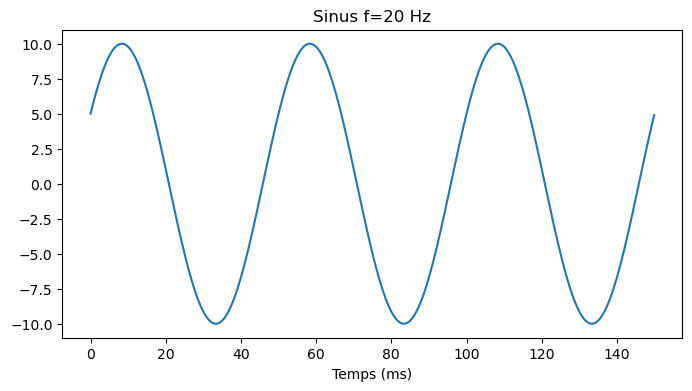

In [3]:
dt = 0.0001
t = np.arange(0, 0.150, dt)
x = 10*np.cos(2*np.pi*20*t - np.pi/3)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(1000*t,x)
ax1.set_title("Sinus f=20 Hz")
ax1.set_xlabel("Temps (ms)")

Ici, la fréquence est $f=20$ Hz, ou encore $\omega=40\pi$ rad/sec ($\omega=2\pi f$). Ainsi, la période est $T=1/f = 1/20 = 50$ ms, comme on le voit sur la figure.

La phase $\phi = -\pi/3$ radians représente un retard de $\pi/3$ radians. Ainsi, $x(t)$ passe par sa valeur maximale à $t$ = 8.3 ms (1/6 de sa période) au lieu de $t$ = 0 (qui correspondrait à un cosinus de phase nulle).

Les harmoniques d’un signal périodique sont des sinusoïdes dont les fréquences sont régulièrement espacées. Plus précisément, les harmoniques d’un signal périodique, de période $T$, ont des fréquences qui sont des multiples entiers de la fréquence fondamentale $1/T$. Par exemple, pour un signal périodique de période $T=1$ seconde, les harmoniques sont les sinusoïdes de fréquence $1/T$, $2/T$, $3/T$, …, $k/T$, …, i.e. 1 Hz, 2 Hz, 3 Hz, etc.

La somme d’une série d’harmoniques ne peut donner qu’un signal de même période que la fondamentale. Par exemple (avec $T=1$):


Text(0.5, 0, 'Temps (ms)')

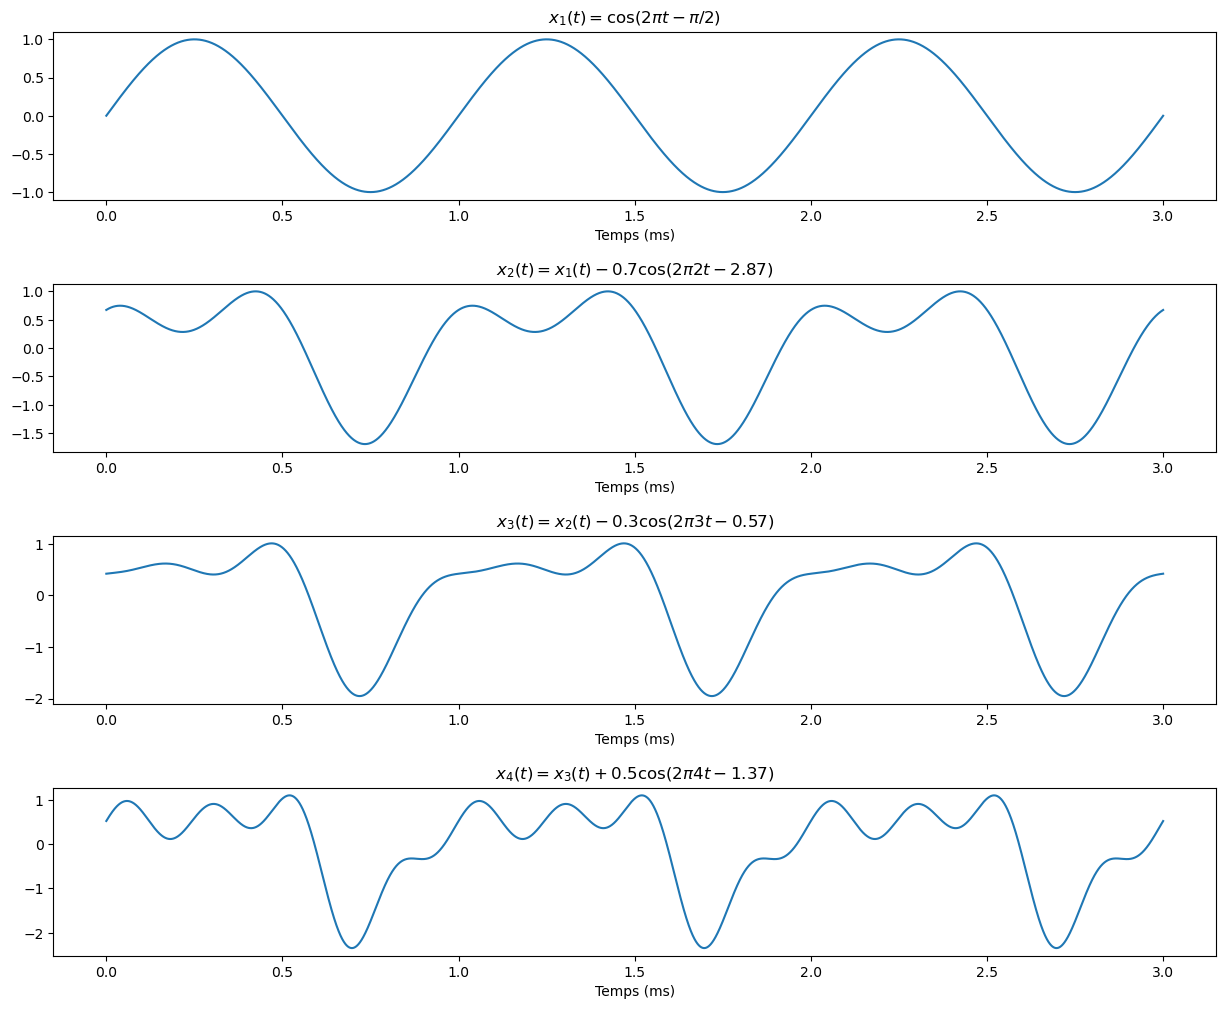

In [4]:
dt = 0.0001
t = np.arange(0, 3, dt)

x1 = 1*np.cos(2*np.pi*1*t - np.pi/2)
x2 = x1 - 0.7*np.cos(2*np.pi*2*t - 2.87)
x3 = x2 - 0.3*np.cos(2*np.pi*3*t - 0.57)
x4 = x3 + 0.5*np.cos(2*np.pi*4*t - 1.37)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(4,1,1)
ax1.plot(t,x1)
ax1.set_title("$x_1 (t) = \cos(2\pi t - \pi/2)$")
ax1.set_xlabel("Temps (ms)")

ax2 = plt.subplot(4,1,2)
ax2.plot(t,x2)
ax2.set_title("$x_2 (t) = x_1(t) - 0.7\cos(2\pi 2t - 2.87)$")
ax2.set_xlabel("Temps (ms)")

ax3 = plt.subplot(4,1,3)
ax3.plot(t,x3)
ax3.set_title("$x_3 (t) = x_2(t) - 0.3\cos(2\pi 3t - 0.57)$")
ax3.set_xlabel("Temps (ms)")

ax4 = plt.subplot(4,1,4)
ax4.plot(t,x4)
ax4.set_title("$x_4 (t) = x_3(t) + 0.5\cos(2\pi 4t - 1.37)$")
ax4.set_xlabel("Temps (ms)")

<a class="anchor" name="x4"></a>
La première figure montre la fondamentale (un cosinus pur de fréquence 1 Hz). La seconde figure montre la somme de la fondamentale et de la seconde harmonique (de fréquence 2 Hz). Dans les 3e et 4e figures, on ajoute respectivement la 3e et 4e harmonique, de fréquence 3 et 4 Hz.

Notez que le signal se « complexifie » à mesure qu’on ajoute des harmoniques. Notez aussi que la période demeure inchangée : elle est toujours de 1 seconde, peu importe le nombre d’harmoniques.

On a ainsi construit un signal périodique, de période $T=$1 seconde, en additionnant 4 harmoniques de période fondamentale 1 seconde. Le résultat est le signal $x_4(t)$. Le contrôle sur la forme du signal ainsi reconstruit repose sur deux degrés de liberté pour chaque harmonique : son amplitude, et sa phase. Dans l’exemple ci-haut, on a choisit, au hasard, les amplitudes 1, -0.7, -0.3 et 0.5, et les phases sont -$\pi$/2, -2.87, -0.57 et –1.37.

En notant que 

>$-\cos(\theta) = cos(\theta- \pi)$

et

>$-\sin(\theta) = sin(\theta- \pi)$

on peut écrire la somme d’harmoniques avec  des amplitudes uniquement positives, en ajoutant (ou en soustrayant) une phase de $\pi$ à chaque harmonique d’amplitude négative:

$\begin{aligned} x_4(t)  = \quad \quad & \cos (2 \pi t-\pi / 2) \\  + 0.7 & \cos (2 \pi 2 t+0.27) \\  + 0.3 &\cos (2 \pi 3 t+2.57) \\  + 0.5 &\cos (2 \pi 4 t-1.37)\end{aligned}$


(On retire $\pi$ si la phase est positive, et on ajoute $\pi$ si la phase est négative, de façon à maintenir la phase entre $-\pi$ et $\pi$).

On appelle cette forme des séries de Fourier, la forme polaire. Ainsi, on dira que le signal $x_4(t)$ est formé de 4 harmoniques, respectivement à 1, 2, 3 et 4 Hz, dont les amplitudes sont 1, 0.7, 0.3 et 0.5, et dont les phases sont - $\pi$/2, 0.27, 2.57 et –1.37.

Cette information peut être représentée sous forme de spectres. Le spectre d’amplitude donne l’amplitude de chaque harmonique d’un signal, et le spectre de phase donne la phase de chaque harmonique. Ainsi, les spectres d’amplitude et de phase du signal $x_4(t)$ sont tels que représentés dans les figures ci-dessous :


Text(0.5, 0, "k (Index de l'harmonique)")

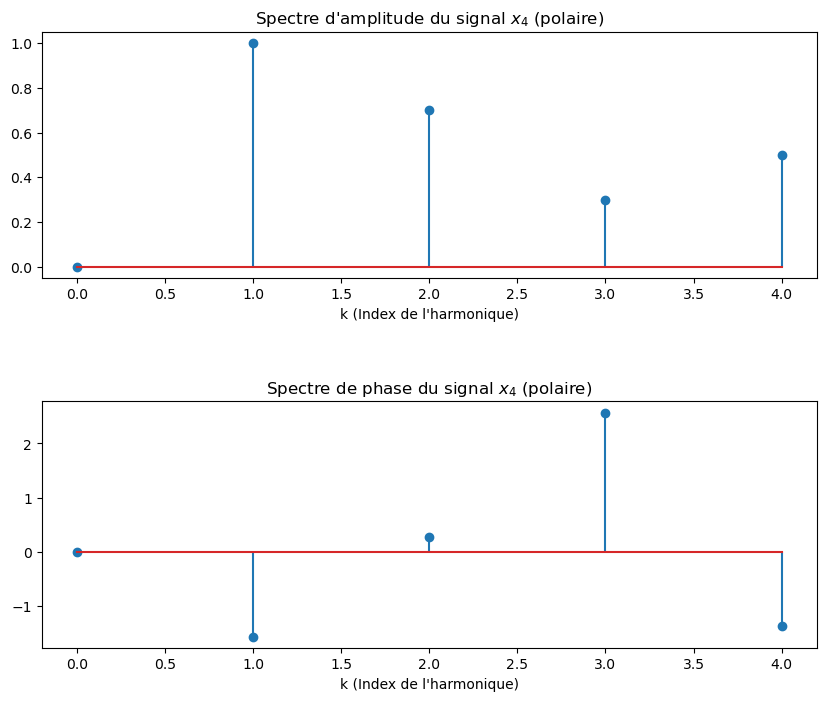

In [5]:
# En reprenant la fonction x4(t) définie précedemment 
T4 = 1.0
w0 = 2*np.pi/T4
t = np.arange(0, T4, dt)
N = int(T4/dt)
NHarmonique = 4
#x1[0:N]

C = np.zeros((NHarmonique+1,1), dtype=complex)
for k in range(NHarmonique+1):
    if k==0:
        n_exp = np.ones_like(t)
    else:
        n_exp = np.exp(-1j*k*w0*t)
    C[k] = (1/T4)*np.sum(x4[0:N]*n_exp)*dt
    

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.stem(range(NHarmonique+1), 2*np.abs(C))
ax1.set_title("Spectre d\'amplitude du signal $x_4$ (polaire)")
ax1.set_xlabel("k (Index de l'harmonique)")

ax2 = plt.subplot(2,1,2)
ang = np.angle(C)
ang[0] = 0 #Un angle sur une composante DC n'a pas de signification réelle
ax2.stem(range(NHarmonique+1), ang)
ax2.set_title("Spectre de phase du signal $x_4$ (polaire)")
ax2.set_xlabel("k (Index de l'harmonique)")

<a class="anchor" name="polaire"></a>
Notez qu’on a inclut une harmonique « 0 » ($k=0$). Ceci correspond à la composante DC du signal. Puisque $x_4(t)$ n’a pas de composante DC, l’amplitude de l’harmonique $k=0$ est 0 et, étant une composante DC, sa phase n'a pas de signification.

Dans cet exemple, l'index $k$ de l’harmonique correspond à la fréquence (en Hz), puisque la fréquence fondamentale est 1 Hz. Ceci n’est pas le cas en général, de sorte qu’il faut toujours faire correspondre une échelle de fréquence aux indices des harmoniques.

Les exponentielles complexes étant une forme compacte, et très utile, des fonctions harmoniques, on trouve une seconde représentation des harmoniques d’un signal : la forme complexe du spectre. On se base sur le théorème d’Euler, selon lequel :

>$ \cos(\theta) = \frac{1}{2}\left(\mathrm{e}^{j\theta}+\mathrm{e}^{-j\theta}\right)$

Ainsi on peut écrire

>$\begin{aligned} A \cos (\omega t+\varphi) & =\frac{A}{2}\left(e^{j(\omega t+\varphi)}+e^{-j(\omega t+\varphi)}\right) \\ & =\frac{A}{2} e^{j \varphi} e^{j \omega t}+\frac{A}{2} e^{-j \varphi} e^{-j \omega t}\end{aligned}$


Puisqu’il faut deux exponentielle complexes ($\mathrm{e}^{j\theta}$ et $\mathrm{e}^{-j\theta}$) pour faire un cosinus réel, chaque harmonique fera apparaître 2 raies spectrales dans le spectre complexe : une à $\omega t$, l’autre à $-\omega t$, correspondant à chacune des deux exponentielles complexes (tournant l’une dans le sens inverse de l’autre…).

Le coefficient multipliant chacune des exponentielles complexes est à son tour un nombre complexe : il a donc une amplitude et une phase. L’amplitude est $A/2$ (la moitié de l’amplitude $A$ dans la représentation polaire), et la phase est $\phi$ ou $-\phi$ (même phase que dans la représentation polaire, à un signe près pour la fréquence « négative »).

Les figures suivantes montrent le spectre de Fourier, dans sa forme complexe, du signal périodique $x_4(t)$ :


Text(0.5, 0, "k (Index de l'harmonique)")

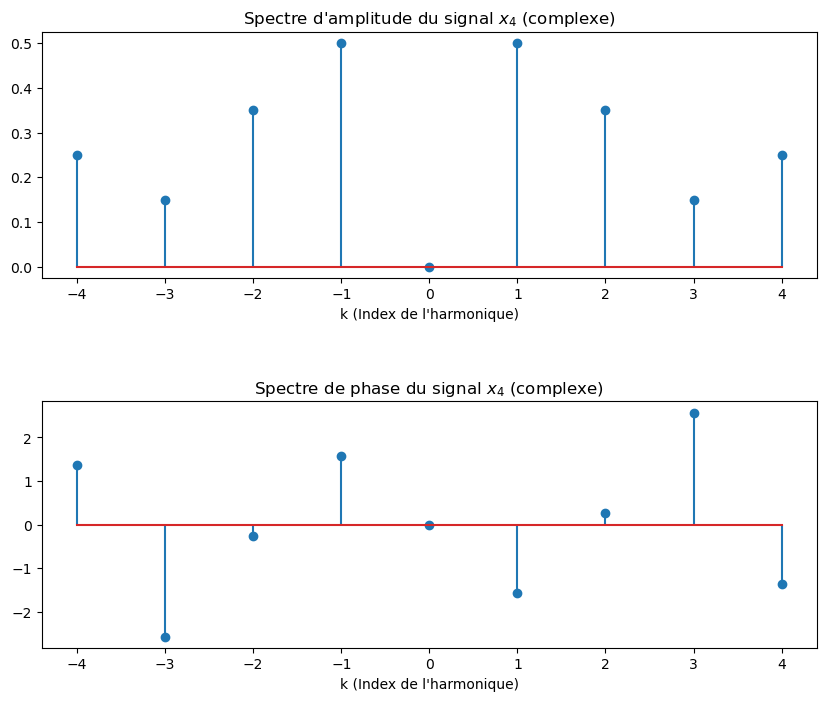

In [6]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.stem(range(-NHarmonique, NHarmonique+1), np.concatenate((np.abs(np.flip(C[1:])), np.abs(C))))
ax1.set_title("Spectre d\'amplitude du signal $x_4$ (complexe)")
ax1.set_xlabel("k (Index de l'harmonique)")

ax2 = plt.subplot(2,1,2)
ang = np.angle(C)
ang[0] = 0 #Un angle sur une composante DC n'a pas de signification réelle
ax2.stem(range(-NHarmonique, NHarmonique+1), np.concatenate((np.flip(-ang[1:]), ang)))
ax2.set_title("Spectre de phase du signal $x_4$ (complexe)")
ax2.set_xlabel("k (Index de l'harmonique)")

Notez bien que dans la forme complexe du spectre, on retrouve à la fois des valeurs positives et négatives de $k$ (indice d’une harmonique). Les valeurs positives correspondent aux exponentielles de fréquence « positive » ($\mathrm{e}^{j\theta}$) et les valeurs négatives correspondent aux exponentielles de fréquence « négative » ($\mathrm{e}^{-j\theta}$).

Ainsi, on interprète ces spectres de la façon suivante :

Le signal temporel correspondant (ici, $x_4(t)$) est formé de la somme de 8 exponentielles complexes (par paires, elles forment un cosinus réel), de fréquences $k\omega_0$, où $\omega_0$ est la fréquence fondamentale et $k$ est l'index de l’harmonique. Dans le cas du signal $x_4(t)$, la fréquence fondamentale est $\omega_0 = 2\pi$ (voir [ici](#x4)). Le coefficient qui multiplie chaque exponentielle complexe est aussi un nombre complexe $A \mathrm{e}^{j\phi}$, dont le module $A$ est donné par le spectre d’amplitude, et la phase $\phi$ est donnée par le spectre de phase.

Pour la première harmonique ($k=\pm1$) de $x_4(t)$, on peut donc écrire

>$\begin{aligned} x_1(t) & =0.5 e^{j(-\pi / 2)} e^{j 2 \pi t}+0.5 e^{j(\pi / 2)} e^{-j 2 \pi t} \\ & =0.5 e^{j(2 \pi t-\pi / 2)}+0.5 e^{j(2 \pi t-\pi / 2)} \\ & =\cos (2 \pi t-\pi / 2)\end{aligned}$

ce qui correspond bien à l’harmonique $x_1(t)$ décrite [plus haut](#x4).

On fait le même calcul pour les autres harmoniques ($k=\pm 2, \pm3$ et $\pm4$).

### Symetrie des spectres

On observe facilement que le spectre d’amplitude est symétrique par rapport à $k=0$. De même, le spectre de phase est antisymétrique par rapport à $k=0$. Ceci rappelle une propriété vue sur la parité des signaux :

>**Le spectre d’amplitude est pair**
>
>**Le spectre de phase est impair**

On comprend donc, à cause de cette propriété de parité, que l’on peut reconstruire le signal temporel avec uniquement l’information des raies spectrales de fréquences positives ($k \geq 0$), l’autre moitié du spectre ($k < 0$) pouvant en être déduit par symétrie.

Avant de passer à la prochaine section, assurez-vous de bien comprendre la relation entre le domaine du temps et le domaine des fréquences. Prenez quelques temps pour résoudre les exercices suivants.

Exercice 1

Affichez les spectres d’amplitude et de phase (forme polaire et forme exponentielle) des signaux suivants :

>$x_1(t)=10 \cos (2 \pi 50 t-0.5)$

>$x_2(t)=10 \sin (2 \pi 50 t-0.5)$

>$x_3(t)=25-10 \cos (2 \pi 50 t-\pi / 3)+10 \cos (2 \pi 100 t-2.0)$

Exercice 2

Calculez le signal temporel $x(t)$ dont les spectres d’amplitude et de phase sont donnés dans les 2 figures suivantes (la raie $k=1$ correspond à la fondamentale, de période $T$=0.1 sec) :

Text(0.5, 0, "k (Index de l'harmonique)")

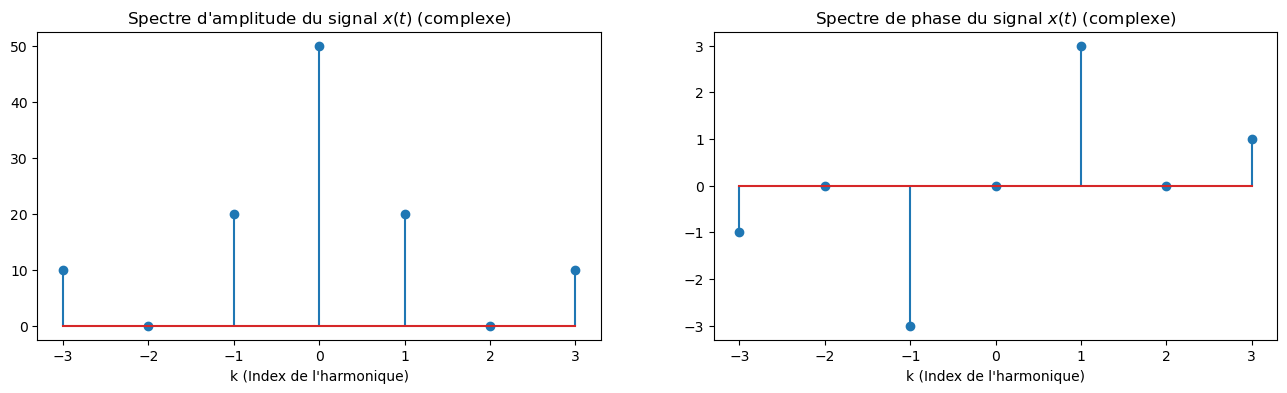

In [7]:
K = range(-3,4)
Amplitude = [10,0,20,50,20,0,10]
Phase = [-1, 0, -3, 0, 3, 0, 1]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(4)

ax1 = plt.subplot(1,2,1)
ax1.stem(K, Amplitude)
ax1.set_title("Spectre d\'amplitude du signal $x(t)$ (complexe)")
ax1.set_xlabel("k (Index de l'harmonique)")

ax2 = plt.subplot(1,2,2)
ax2.stem(K, Phase)
ax2.set_title("Spectre de phase du signal $x(t)$ (complexe)")
ax2.set_xlabel("k (Index de l'harmonique)")

## Calcul des coefficients de Fourier

Dans la section 2, on a vu comment représenter un signal temporel périodique dans le domaine spectral, i.e. en représentant l’amplitude et la phase de chacune de ses composantes harmoniques. Les signaux présentés étaient relativement simples (quelques sinusoïdes), et surtout, on savait à l’avance quelles sinusoïdes se retrouvaient dans ces signaux.

Dans cette section, nous allons étendre l’analyse spectrale à des signaux périodiques quelconques, et nous allons montrer comment décomposer ces signaux en une somme de sinusoïdes (i.e. comment calculer l’amplitude et la phase de leurs harmoniques).
Lorsqu’on dit qu’un signal périodique $x(t)$ peut se décomposer en une somme d’harmoniques, ceci s’exprime mathématiquement comme suit :

>$x(t)=C_0+\sum_{k=1}^{\infty} C_k \cos \left(k \omega_0 t+\varphi_k\right)$

où $C_0$ est la composante DC, $C_k$ et $\varphi k$ sont respectivement l’amplitude et la phase de l’harmonique $k$, et $\omega 0$ est la fréquence fondamentale du signal $x(t)$. Ceci est bien sûr la forme polaire, telle que vue dans la section 2. Pour le signal $x_4(t)$ ([ici](#x4)), on avait
    
|  |  |  |
| --- | --- | -------- |
| $C_0$ | = | 0 |
| $C_1$ | = | 1 |
| $C_2$ | = | 0.7 |
| $C_3$ | = | 0.3 |
| $C_4$ | = | 0.5 |
| $\phi_1$ | = | $\frac{-\pi}{2}$ |
| $\phi_2$ | = | 0.27 |
| $\phi_3$ | = | 2.57 |
| $\phi_4$ | = | -1.37 |


et tous les autres coefficients nuls pour $k>4$.

Alternativement, on peut aussi écrire x(t) comme une série d’harmoniques dans la forme exponentielle :

$$x(t)=\sum_{k=-\infty}^{\infty} X_k \mathrm{e}^{j k \omega_0 t}$$

Dans cette forme exponentielle, les coefficients $X_k$ sont complexes, i.e. qu’ils comprennent à la fois le module et la phase de chacune des harmoniques. (Retournez [ici](#polaire), si nécessaire, pour bien comprendre le lien entre ces 2 représentations – polaire et exponentielle).

Dans ce qui suit, nous allons choisir la représentation exponentielle, puisqu’il sera plus facile de manipuler les exponentielles complexes que les sinusoïdes dans le calcul des intégrales.

Soit, donc, un signal périodique $x(t)$, de période $T$ secondes. Pour fixer les idées, nous allons prendre l’onde carrée périodique de la figure suivante :
<a class="anchor" name="carree"></a>

Text(0.5, 0, 'Temps(s)')

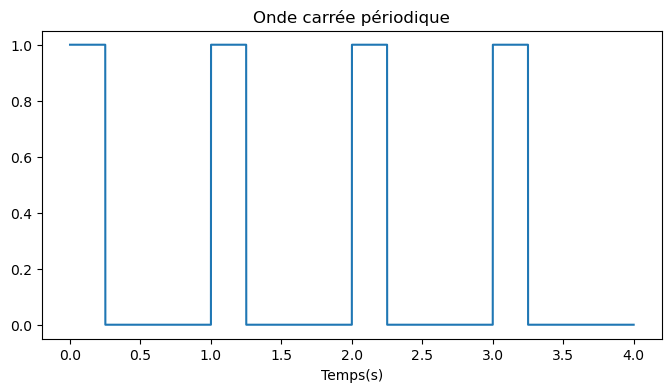

In [8]:
t2 = np.arange(0,4, dt)
xt = 0.5*signal.square(2*np.pi*t2, duty=0.25)+0.5

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(t2,xt)
ax1.set_title("Onde carrée périodique")
ax1.set_xlabel("Temps(s)")



Il s’agit d’une onde carrée périodique, de période $T=1$ seconde, dont le facteur d’activité est 25 % (la fonction vaut « 1 » dans le premier 25% de la période, et « 0 » pour le reste de la période). De plus, le début de l’activité d’une des périodes coïncide avec t=0.

Comment trouver les harmoniques qui se cachent dans ce signal (où rien, en fait, ne laisse deviner une forme sinusoïdale quelconque)?

Nous allons d’abord poser

>$x(t)=\sum_{k=-\infty}^{\infty} X_k \mathrm{e}^{j k \omega_0 t}$

(i.e. imposer que le signal x(t) soit égal à une somme d’harmoniques) et tenter de voir s’il existe un moyen de calculer les coefficients Xk en ne connaissant que le signal x(t) et sa fréquence fondamentale 0 (1 seconde dans le cas de l’onde carrée ci-haut).

On peut ensuite écrire quelques uns des termes de cette relation :

>$x(t)=\ldots+X_{-2} \mathrm{e}^{-j 2 \omega_0 t}+X_{-1} \mathrm{e}^{-j \omega_0 t}+X_0+X_1 \mathrm{e}^{j \omega_0 t}+X_2 \mathrm{e}^{j 2 \omega_0 t}+\ldots$

Supposons maintenant qu’on désire calculer le terme $X_2$. En divisant chaque terme de l’équation ci-haut par 

>$\mathrm{e}^{j 2 \omega_0 t}$

i.e. en multipliant chaque terme par

>$\mathrm{e}^{-j 2 \omega_0 t}$

on peut déjà isoler le terme X2 dans la somme :

>$x(t)\mathrm{e}^{-j 2 \omega_0 t} = \ldots+X_{-2} \mathrm{e}^{-j 4 \omega_0 t}+X_{-1} \mathrm{e}^{- j 3 \omega_0 t}+X_0 \mathrm{e}^{- j  2 \omega_0 t} + X_1 \mathrm{e}^{-j 2 \omega_0 t} +X_2+\ldots$

Tous les termes à droite de cette équation (sauf le terme $X_2$) sont des exponentielles complexes contenant un nombre entier de périodes dans la période fondamentale $T$, puisque leur fréquence est un multiple entier de la fréquence fondamentale $\omega_0 = 2\pi/T$.

Ainsi, en intégrant sur une période $T$, chaque terme de droite va s’annuler puisque le sinus ou le cosinus (partie imaginaire et partie réelle) de chaque exponentielle complexe contient autant de demi-cycles positifs que de demi-cycles négatifs dans une durée T (nombre entier de périodes pour chaque exponentielle complexe).

Par exemple, pour le terme contenant $X_{-2}$, on a, en intégrant sur une période :

\begin{equation}
\int_{t=0}^{t=T} X_{-2} \mathrm{e}^{-j 4 \omega_0 t} d t=X_{-2} \int_{t=0}^{t=T} \mathrm{e}^{-j 4 \omega_0 t} d t=X_{-2} \frac{\mathrm{e}^{-j 4 \omega_0 T}-1}{-j 4 \omega_0}=X_{-2} \frac{\mathrm{e}^{-j 4 \frac{2 \pi}{T} T}-1}{-j 4 \omega_0}=0
\end{equation}

(puisque $\mathrm{e}^{-j 8 \omega_0 t} = 1$).

Les seuls termes qui seront non-nuls après l’intégrale sont le terme de gauche incluant x(t) et (ici) le terme de droite incluant X2. On a donc

$$ \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j 2 \omega_0 t} d t=  \int_{t=0}^{t=T} X_{2} d t $$

Puisque $X_2$ est une constante (le coefficient spectral recherché pour l’harmonique $k=2$), on a 

$$\int_{t=0}^{t=T} x(t) \mathrm{e}^{-j 2 \omega_0 t} d t=  X_{2}  \int_{t=0}^{t=T}d t$$

ce qui donne, en intégrant à droite :

$$\int_{t=0}^{t=T} x(t) \mathrm{e}^{-j 2 \omega_0 t} d t=  TX_{2}$$

et finalement :

$$X_{2} = \frac{1}{T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j 2 \omega_0 t} d t  $$

On y est arrivé… On extrait le coefficient de Fourier $X_2$ de l’harmonique $k=2$ en multipliant le signal à analyser $x(t)$ par 

$$ \mathrm{e}^{-j 2 \omega_0 t} $$

(notez le signe négatif dans l’exposant) puis en intégrant sur une période, et en divisant par la période $T$.

On aurait tout aussi bien pu calculer le coefficient de Fourier $X_k$ de l’harmonique $k$, en multipliant le signal $x(t)$ par


$$ \mathrm{e}^{-j k \omega_0 t} $$

Puis en intégrant sur une période et en divisant par $T$. C’est l’équation générale de l’analyse en séries de Fourier :

<div class="alert alert-block alert-info">
Série de Fourier : $$X_{k} = \frac{1}{T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j k \omega_0 t} d t  $$
</div>

La DC ($X_0$) du signal $x(t)$ s’obtient en posant $k=0$ dans cette expression, ce qui donne simplement :

$$X_{0} = \frac{1}{T} \int_{t=0}^{t=T} x(t) d t  $$

i.e. que la DC $X_0$ est la moyenne du signal $x(t)$. Notez que la DC est toujours réelle…

Revenons maintenant au signal périodique ([onde carrée](#carree)). On voulait calculer ses harmoniques, de façon à calculer l’amplitude et la phase de toutes les sinusoïdes contenues dans ce signal. Puisque $x(t)$ est très simple (il vaut 1 de 0 à 0.25 sec, et 0 de 0.25 à 1 seconde), l’intégrale ci-haut se calculera très facilement. En effet, en prenant la période complète entre 0 et 1 seconde, on a 

$$X_{0} = \frac{1}{1} \int_{t=0}^{t=\frac{1}{4}}d t = \frac{1}{4} $$

C’est la composante DC de cette onde carrée.

Pour les autres harmoniques, on a (avec $\omega_0 = 2\pi/T = 2\pi/1 = 2\pi$):

$$X_{k} = \frac{1}{1} \int_{t=0}^{t=\frac{1}{4}} 1 \mathrm{e}^{-j k 2\pi t} d t  $$

$$X_{k} = \frac{\mathrm{e}^{-j k 2\pi 1/4} -1}{-j k 2\pi}$$

$$X_{k} = \frac{\mathrm{e}^{-j k \pi/2} -1}{-j k 2\pi}$$

On pourrait laisser ce terme sous cette forme, mais en manipulant un peu cette expression, on arrive à une forme beaucoup plus intéressante.  En effet, au numérateur, on peu mettre en évidence le terme suivant :

$$\mathrm{e}^{-j k \pi/4}$$

$$X_{k} = \frac{\mathrm{e}^{-j k \pi/4}}{\pi k} \frac{\left(\mathrm{e}^{-j k \pi/4} - \mathrm{e}^{j k \pi/4}\right)}{-2j}$$

$$X_{k} = \frac{\mathrm{e}^{-j k \pi/4}}{\pi k} \frac{\left(\mathrm{e}^{j k \pi/4} - \mathrm{e}^{-j k \pi/4}\right)}{2j}$$

On reconnaît ici, avec le théorème d’Euler, la forme d’une sinusoïde qui dépend de l’indice $k$ (attention, on est dans les **fréquences**, ici, pas dans le temps..) :

$$X_{k} = \frac{\mathrm{e}^{-j k \pi/4}}{\pi k} \sin\left(\frac{k\pi}{4}\right)$$

C’est l’expression des coefficients de Fourier de l’onde carrée périodique, de période $T=1$, et de facteur d’activité 25 %.

OK, mais on fait quoi avec ça?

Rappelons-nous que $X_k$ est le facteur par lequel il faut multiplier chaque exponentielle complexe (i.e. chaque harmonique)

>$\mathrm{e}^{-j k \omega_0 t}$

pour qu’en les additionnant, on retrouve le signal $x(t)$ (ici, l’onde carrée périodique).

On voit bien que $X_k$ est un nombre complexe, i.e. qu’il renferme à la fois l’amplitude (module) et la phase de l’harmonique $k$. Voyons donc quels sont le module et la phase de $X_k$. Le terme

>$\mathrm{e}^{-j k \pi/4}$

est un complexe de module 1, et de phase $–k\pi/4$, alors que le terme

>$ \sin\left(\frac{k\pi}{4}\right)$

est un nombre réel (de phase 0 lorsqu’il est positif, ou de phase $\pi$ lorsqu’il est négatif). On peut donc maintenant écrire les phases et les amplitudes des harmoniques :

    
| $$k$$ | Amplitude | Phase |
| --- | --- | --- |
| 0   | $\frac{1}{4}$ | 0 |
| 1 | $\sin(\frac{\pi/4}{\pi})$ | $\frac{-\pi}{4}$ |
| 2 | $\sin(\frac{2\pi/4}{2\pi})$ | $\frac{-2\pi}{4}$ |
| 3 | $\sin(\frac{3\pi/4}{3\pi})$ | $\frac{-3\pi}{4}$ |
| 4 | $\sin(\frac{4\pi/4}{4\pi})$ | $\frac{-4\pi}{4}$ |
| 5* | $\sin(\frac{5\pi/4}{5\pi})$ | $\frac{-\pi}{4}$ |
| ... | ... | ... |


(* attention : le signe du sinus change ici, ce qui fait faire un saut de $\pi$ à la phase)

En évaluant les amplitudes, on trouve les valeurs suivantes :

    
| $$k$$ | Amplitude | Phase |
| --- | --- | --- |
| 0   | $\frac{1}{4}$ | 0 |
| 1 | 0.2251 | $\frac{-\pi}{4}$ |
| 2 | 0.1592 | $\frac{-2\pi}{4}$ |
| 3 | 0.750 | $\frac{-3\pi}{4}$ |
| 4 | 0.0000 | $\frac{-4\pi}{4}$ |
| 5* | 0.450 | $\frac{-\pi}{4}$ |
| ... | ... | ... |


Ainsi, on peut exprimer l’[onde carrée périodique](#carree) comme une somme de cosinus, dont les amplitudes et les phases sont données ci-haut (rappelons que dans la forme polaire, les amplitudes des harmoniques – sauf pour la DC – sont le double des amplitudes de la [forme complexe](#polaire)):

>$\begin{aligned} x(t) = \quad \quad & 1/4 \\ +\quad & 2 * 0.2251\cos(2\pi t - \pi/4)  \\ +\quad & 2 * 0.1592\cos(2\pi 2t - 2\pi/4) \\ +\quad & 2 * 0.0750\cos(2\pi 3t - 3\pi/4) \\ +\quad & 2 * 0.0000 \cos(2\pi 4t - 4\pi/4) \\ +\quad & 2 * 0.0450\cos(2\pi 5t - \pi/4) \\ +\quad & \quad ...\end{aligned}$

La figure ci-dessous montre, pour une période (1 seconde), la somme de la DC (1/4) et des 5 premières harmoniques ci-haut (on montre aussi l’onde carrée $x(t)$ qui doit être égale à la somme de ses harmoniques). On observe qu’en additionnant uniquement 5 sinusoïdes (plus la DC), avec les bonnes phases et les bonnes amplitudes (i.e. les 5 premières harmoniques), on arrive déjà à tendre vers la forme du signal périodique $x(t)$. On a cependant coupé trop tôt dans la somme. La figure suivante montre donc la somme des 20 premières harmoniques. On observe qu’on tend beaucoup mieux vers le signal $x(t)$ (la somme des harmoniques converge vers $x(t)$).

En observant (ci-dessous) le spectre d’amplitude de l’onde carrée périodique $x(t)$, on comprend pourquoi les 5 premières harmoniques ne suffisent pas à reconstruire proprement le signal. La figure montre également le spectre de phase pour les 20 première harmoniques, qui se rapproche beaucoup plus de l'onde carrée. 

Notez encore que le spectre d’amplitude est pair, et que le spectre de phase est impair.


Text(0.5, 0, 'Temps(s)')

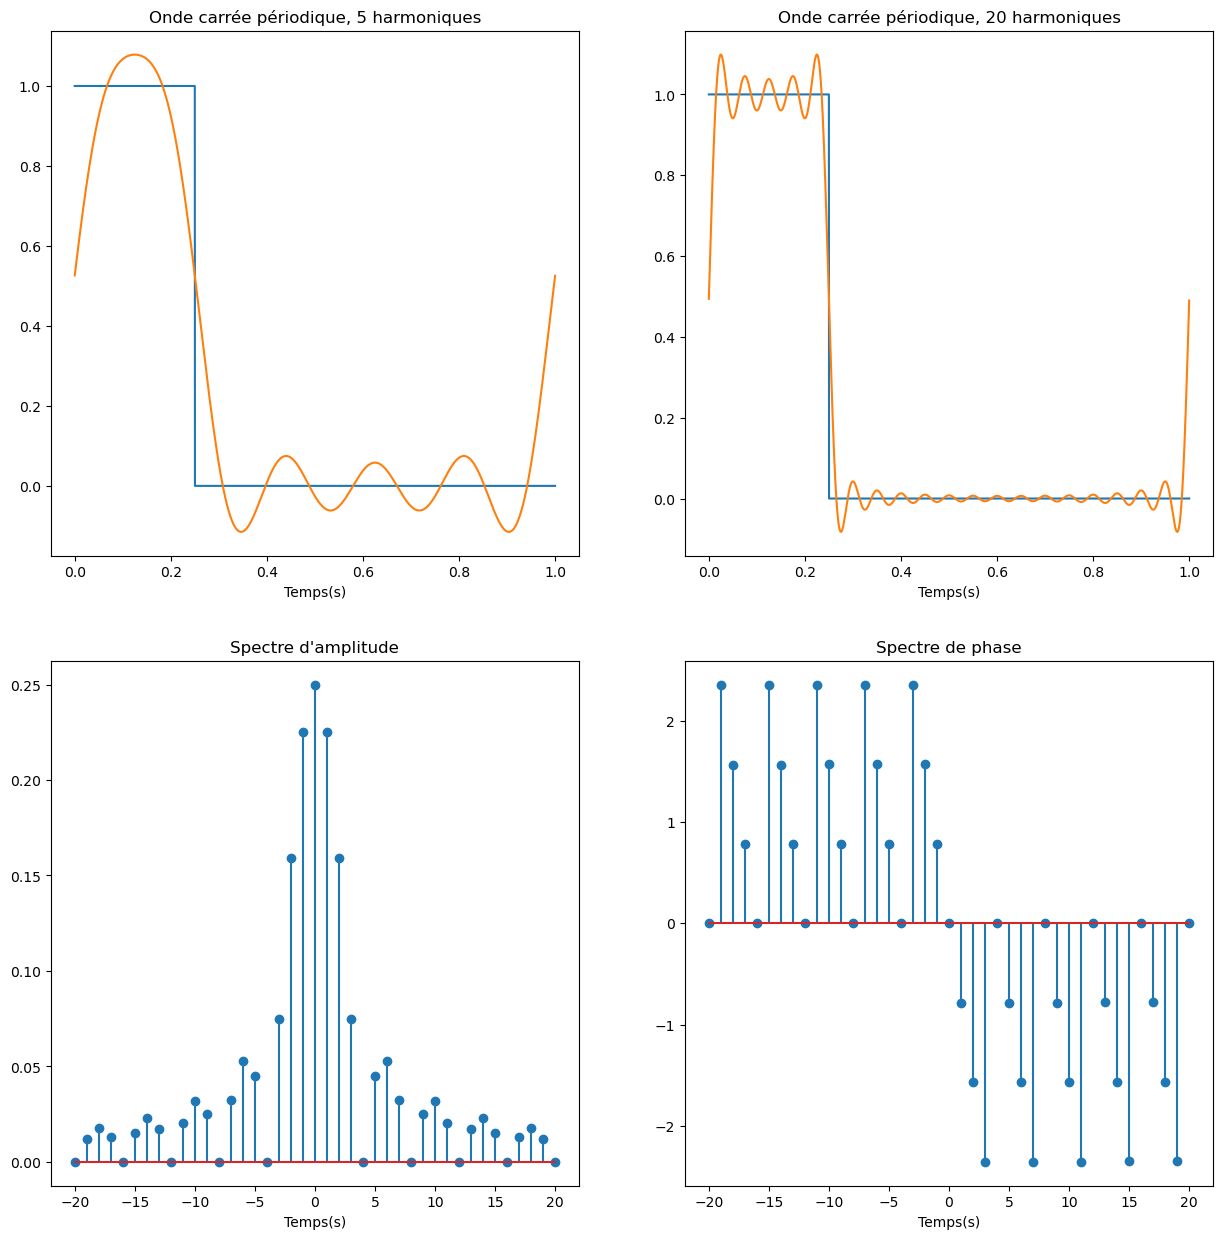

In [10]:
# En reprenant la fonction x(t) définie précedemment 
T = 1.0
w0 = 2*np.pi/T
t = np.arange(0, T, dt)
xt = 0.5*signal.square(2*np.pi*t, duty=0.25)+0.5
N = int(T/dt)
NHarmonique = 5

C5 = np.zeros((NHarmonique+1,1), dtype=complex)
x_N5 = np.zeros_like(t)
for k in range(NHarmonique+1):
    n_exp = np.exp(-1j*k*w0*t)
    C5[k] = (1/T)*np.sum(xt*n_exp)*dt
    if k==0:
        x_N5 += np.abs(C5[k])
    else:
        x_N5 += 2*np.abs(C5[k])*np.cos(k*w0*t+np.angle(C5[k]))

NHarmonique = 20
C20 = np.zeros((NHarmonique+1,1), dtype=complex)
x_N20 = np.zeros_like(t)
for k in range(NHarmonique+1):
    n_exp = np.exp(-1j*k*w0*t)
    C20[k] = (1/T)*np.sum(xt*n_exp)*dt
    if k==0:
        x_N20 += np.abs(C20[k])
    else:
        x_N20 += 2*np.abs(C20[k])*np.cos(k*w0*t+np.angle(C20[k]))
    
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(15)

ax1 = plt.subplot(2,2,1)
ax1.plot(t,xt)
ax1.plot(t, x_N5)
ax1.set_title("Onde carrée périodique, 5 harmoniques")
ax1.set_xlabel("Temps(s)")

ax2 = plt.subplot(2,2,2)
ax2.plot(t,xt)
ax2.plot(t, x_N20)
ax2.set_title("Onde carrée périodique, 20 harmoniques")
ax2.set_xlabel("Temps(s)")

ax3 = plt.subplot(2,2,3)
ax3.stem(range(-20, 21), np.concatenate((np.abs(np.flip(C20[1:])), np.abs(C20))))
ax3.set_title("Spectre d'amplitude")
ax3.set_xlabel("Temps(s)")

ax4 = plt.subplot(2,2,4)
C20.real[abs(C20.real)<1e-15]=0
C20.imag[abs(C20.imag)<1e-15]=0
ang = np.angle(C20)
ang[0] = 0 #Un angle sur une composante DC n'a pas de signification réelle
ax4.stem(range(-20, 21), np.concatenate((np.flip(-ang[1:]), ang)))
ax4.set_title("Spectre de phase")
ax4.set_xlabel("Temps(s)")


## Calcul des $X(k)$ à l’aide de Python

Avant de passer en revue quelques propriétés des séries de Fourier (Section 5.0), nous allons montrer ici comment calculer les coefficients de Fourier (les $X(k)$) avec Python et Numpy. Ceci vous permettra notamment de vérifier numériquement vos résultats pour les exercices de la section 6.0. Vous pourrez également visualiser la somme des harmoniques afin de vérifier qu’elle tend bien vers le signal $x(t)$ analysé.

Nous n’allons pas voir toutes les fonctionnalités de Python dans cette section; seulement la syntaxe de base nécessaire à nos calculs. De nombreuses références sont disponibles pour approfondir Python et Numpy.

Puisque Numpy est un environnement numérique, l’échelle des temps doit être représentée sur une échelle discrète. On dit que le temps est **échantillonné**. Plus le nombre d’échantillons par seconde est important, **meilleure sera l’approximation numérique**.

Nous allons donc reprendre l’exemple de l’[onde carrée périodique](#carree), et décrire étape par étape comment calculer l’amplitude et la phase de ses 20 premières harmoniques.

D’abord, on importe numpy, pour les manipulations mathématiques, et matplotlib, pour les manipulations graphiques.

```Python
import numpy as np
import matplotlib.pyplot as plt
```

Ensuite, on définit la période entre deux échantillons successifs (discrétisation du temps). Ici, nous allons prendre 1000 échantillons par seconde, i.e. que les échantillons sont espacés de 1/1000e de seconde. On a donc

```Python
dt=1/1000
```

(on choisit le symbole « dt » pour signifier une petite durée – i.e. qui tend vers un élément différentiel).

On prend ensuite une période de signal. Dans notre cas, le signal $x(t)$ a une période d’une seconde; il vaut « 1 » de 0 à $\frac{1}{4}$ de seconde, et « 0 » de $\frac{1}{4}$ de seconde à 1 seconde. Puisqu’on a pris 1000 échantillons par seconde, $x(t)$ vaudra « 1 » sur les premiers 250 échantillons, et « 0 » sur les autres 750 échantillons. Le code suivant montre comment on génère la version numérique de $x(t)$, sur une seconde, dans Python:

```Python
# Importer les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#Création du signal
dt = 1/1000
T = 1
t = np.arange(0, T, dt)
uns = np.ones(250)
zeros = np.zeros(1000-250)
x = np.hstack((uns, zeros))

#Création alternative du signal avec scipy.signal
x2 = 0.5*signal.square(2*np.pi*t, duty=0.25)+0.5

#Affichage du signal
plt.figure()
plt.plot(t,x)
# plt.plot(t,x2)
```

In [ ]:
## NE PAS COPIER CETTE LIGNE ##
#Efface toutes les variables du jupyter notebook
%reset -f 
## ^^NE PAS COPIER CETTE LIGNE^^ ##

# Importer les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#Création du signal
dt = 1/1000
T = 1
t = np.arange(0, T, dt)
uns = np.ones(250)
zeros = np.zeros(1000-250)
x = np.hstack((uns, zeros))

#Création alternative du signal avec scipy.signal
x2 = 0.5*signal.square(2*np.pi*t, duty=0.25)+0.5

#Affichage du signal
plt.figure()
plt.plot(t,x)
# plt.plot(t,x2)


On y voit `dt`, l’intervalle entre deux échantillons (`dt` joue ici le rôle d’élément différentiel). La ligne suivante montre comment on génère l’échelle discrète du temps, pour une période `T` de 1 seconde, par intervalles de `dt` seconde. Notez que l’échelle de temps inclut le « 0 » mais exclut le « 1 » (elle s’arrête à 1-dt). On a ainsi exactement 1000 échantillons, sinon on en aurait eu 1001.

On voit ensuite deux lignes qui permettent de générer 250 uns consécutifs (dans le vecteur `uns`) et 750 zéros consécutifs (dans le vecteur `zeros`). Numpy fonctionne ainsi avec des vecteurs (et éventuellement des matrices). La syntaxe des fonctions numpy `np.ones` et `np.zeros` nous indique ici qu’on a généré deux vecteurs à 1 ligne et 250 (ou 750) colonnes et retourné le résultat dans `uns` et `zeros`.

La ligne suivante crée le vecteur `x`, un vecteur ligne où on a concaténé les vecteur `uns` et `zeros`. Ici, on utilise la fonction `np.hstack` qui empile des vecteurs sur l'axe horizontal, soit l'axe de la dimension "0".

<div class="alert alert-block alert-success">
<b>Alternative:</b> Le module scipy offre la fonction *signal.square* qui génère une onde carrée centrée verticalement autour de 0. La période et le *duty cycle* doivent être spécifiés. Il faut moduler l'amplitude et faire une translation verticale pour obtenir une onde carré de 0 à 1 tel que demandé. Voir la documentation de scipy pour plus de détails.
</div>

Finalement, on peut afficher le vecteur `x` en fonction du temps `t`, avec la fonction  `plot` du module matplotlib (on met l’abscisse d’abord, puis l’ordonnée). Le résultats est la même figure que l'onde carré de la section précédente. 

Maintenant que nous avons le signal temporel $x(t)$, nous allons générer les fonctions exponentielles $\mathrm{e}^{-jk\omega_o t}$ qui se retrouvent dans l’intégrale de Fourier. Dans notre cas, la période du signal $x(t)$ est $T$=1 seconde, de sorte que la fréquence fondamentale $\omega_0 = 2\pi$. Le code suivant montre comment générer dans Python les 20 premières fonctions exponentielles pour $k$=1:20.

```Python
w0 = 2*np.pi

u = np.zeros((20, 1000), dtype=complex)
for k in range(0,20):
    u[k,:] = np.exp(-1j*(k+1)*w0*t)
    
plt.figure()
plt.plot(t, np.real(u[0,:]))
plt.plot(t, np.real(u[1,:]))

```

In [ ]:
w0 = 2*np.pi

u = np.zeros((20, 1000), dtype=complex)
for k in range(0,20):
    u[k,:] = np.exp(-1j*(k+1)*w0*t)
    
plt.figure()
plt.plot(t, np.real(u[0,:]))
plt.plot(t, np.real(u[1,:]))


Il faut créer `u`, une matrice de 20 lignes (nombre d’harmoniques) et 1000 colonnes (nombre d’échantillons dans le temps). La fonction `np.zeros` créer cette matrice et initialise toutes les valeurs à 0. De plus, nous spécifions le type de données à `complex` afin de pouvoir sauvegarder les nombres complexes de l'exponentielle complexe tournante. 

Note : Le nombre imaginaire `1j` est définit par défaut dans Python.

<div class="alert alert-block alert-danger">
<b>Type complex:</b> Si le type de données n'est pas spécifié, le type float est utilisé par défaut. Cependant le type float ne sauvegarde que la partie réelle d'un nombre complexe, i.e. on ne peut sauvegarder 1j dans un float. Dans ce cas, Python émet un *warning* (ComplexWarning: Casting complex values to real discards the imaginary part) et vous n'aurez pas les résultats espérés...
</div>

On défini une boucle `for` qui prendra les valeurs de 0 à 19. Puisque l'on veut les exponentielles tournantes de `k=1:10`, il faut additionner 1 (`k+1`) dans la formule. On assigne dans la variable `u` les 20 fonctions exponentielles complexes, pour `k=0:19`. La syntaxe `u[k, :]` signifie “la ligne k de u”. Donc pour chaque itération de la boucle, on calcule une nouvelle exponentielle et l'on assigne à une nouvelle ligne. La ligne 1 de `u` est une exponentielle complexe tournante faisant exactement 1 tour en 1 seconde (1000 échantillons). La ligne 2 de `u` est une exponentielle complexe tournante faisant exactement 2 tours en 1 seconde, et ainsi de suite. On peut voir ceci en affichant la partie réelle de `u(1, :)` et `u(2, :)`. (On aurait des sinus, bien sûr, en affichant les parties imaginaires…)


On a maintenant tous les éléments pour calculer les coefficients de Fourier du signal $x(t)$ (onde carrée périodique). Puisqu’une intégrale est la limite d’une somme, on a le code Python suivant:

```Python
X = np.zeros(21, dtype=complex)

# Coefficient DC
X[0] = np.sum(x)*dt

#Coefficients de Fourier
for k in range(0,20):
    X[k+1] = np.sum(x*u[k,:])*dt
    
plt.figure()
plt.stem(range(0,21), np.abs(X))
#plt.stem(range(0,21), np.angle(X))

```

In [ ]:
X = np.zeros(21, dtype=complex)

# Coefficient DC
X[0] = np.sum(x)*dt

#Coefficients de Fourier
for k in range(0,20):
    X[k+1] = np.sum(x*u[k,:])*dt
    
plt.figure()
plt.stem(range(0,21), np.abs(X))
#plt.stem(range(0,21), np.angle(X))

La première ligne calcule le coefficient DC. Il s’agit simplement d’intégrer $x(t)$ sur la période $T$.

La boucle pour `k=0:19` calcule successivement les coefficients de Fourier $X(k)$ pour les 20 premières harmoniques. La somme (`np.sum`) est toujours **l’approximation** de l’intégrale et  l’élément `dt` est l’élément différentiel de l’intégration. Rappelons que les fonctions `u(k,:)` sont les exponentielles complexes calculées plus haut. On n’a pas mis le `1/T` devant l’intégrale (la somme) puisqu’ici la période `T` est 1 seconde.

Pour afficher les spectres d’amplitude et de phase, on utilise les fonctions `np.abs` et `np.angle` de numpy. On calcule le spectre d’amplitude à partir du spectre complexe `X`, puis on affiche le spectre d’amplitude (incluant la DC à `k=0`) avec la fonction `plt.stem`. Cette fonction permet un affichage en bâtonnets, contrairement à `plt.plot` qui trace une ligne reliant les points d’une fonction. Remarquez qu’on donne en paramètres à la fonction `plt.stem` l’axe horizontal d’abord (`k` qui va de 0 à 20) et qu’on donne ensuite les amplitudes à afficher, incluant la DC à la position 0 du vecteur `X`.

Finalement, pour boucler la boucle et conclure cette section, on montre ici comment faire la somme des `k` premières harmoniques du signal (incluant la DC) pour afficher le résultat. On peut donc vérifier si le signal est bien formé par la somme de ses harmoniques.

```Python
#Calcul de la DC
y = np.abs(X[0]) * np.ones_like(t) # ones_like crée une matrice avec les mêmes dimensions que la matrice passée en argument

#Changez le nombre d'harmonique entre 1 et 21 pour voir l'effet sur le signal produit
for k in range(1,21):
    y += 2*np.abs(X[k]) * np.cos(k*w0*t + np.angle(X[k]))
    
plt.figure()
plt.plot(t,y)
```

In [ ]:
#Calcul de la DC
y = np.abs(X[0]) * np.ones_like(t) # ones_like crée une matrice avec les mêmes dimensions que la matrice passée en argument

#Changez le nombre d'harmonique entre 1 et 21 pour voir l'effet sur le signal produit
for k in range(1,21):
    y += 2*np.abs(X[k]) * np.cos(k*w0*t + np.angle(X[k]))
    
plt.figure()
plt.plot(t,y)

En faisant varier le nombre d'harmoniques inclus dans la reconstruction du signal, on remarque encore une fois que plus on prend d’harmoniques en considération, plus leur somme tend vers l’onde carrée. En fait, il faudrait une infinité d’harmoniques pour que l’approximation devienne une égalité. Ceci est dû à la coupure abrupte dans la forme d’onde carrée, qui ne peut être reproduite par aucune sinusoïde (elles sont toutes lisses). 

Nous avons maintenant une bonne base pour faire l’analyse spectrale de signaux périodiques et calculer leurs composantes fréquentielles, tant au niveau formel mathématique (l’intégrale de Fourier) qu’au niveau de la simulation numérique.

La prochaine section fera l’étude de quelques propriétés importantes des séries de Fourier.


## Propriétés des Séries de Fourier

### Linéarité 

Le calcul des coefficients de Fourier est une opération linéaire. Ceci veut dire que si on a les coefficients de Fourier $X(k)$ et $Y(k)$ des signaux $x(t)$ et $y(t)$, alors les coefficients de la somme $x(t) + y(t)$ sont égaux à la somme des coefficients, $X(k) + Y(k)$. On résume cette propriété comme suit :

    
| Temps | Fréquence |
| --- | --- |
| $$x(t)$$   | $$X(k)$$ |
| $$y(t)$$ | $$ Y(k)$$ | 
| $$x(t) + y(t)$$ | $$X(k) + Y(k)$$ | 


    
Notez que la somme des coefficients de Fourier, $X(k) + Y(k)$, est une **somme de nombres complexes**. Il ne s’agit pas de faire la somme des amplitudes et/ou des phases. Des nombres complexes s’additionnent dans le plan, comme des vecteurs, et peuvent même s’annuler complètement s’ils pointent dans des directions opposées (même amplitude, mais différence de phase de $\pi$).

### Inversion dans le temps

Si on connaît les coefficients de Fourier $X(k)$ d’un signal $x(t)$, on obtient les coefficients de Fourier du signal $x(-t)$ (inversion dans le temps) simplement en prenant le complexe conjugué de $X(k)$ :

| Temps | Fréquence |
| --- | --- |
| $$x(t)$$   | $$X(k)$$ |
| $$x(-t)$$ | $$ X*(k)$$ | 

Démonstration : soient $X_2(k)$ les coefficients de Fourier de $x(-t)$ :

$$X_2(k) = \frac{1}{T} \int_{t=0}^{t=T} x(-t) \mathrm{e}^{-j k \omega_0 t} d t  $$

$$X_2(k) = \frac{1}{T} \int_{\tau=0}^{\tau=-T} x(\tau) \mathrm{e}^{-j k \omega_0 \tau} \left(-d \tau \right)  $$

où on a fait la changement de variable $\tau = -t$. On intègre maintenant « dans le sens inverse » du temps, i.e. de 0 à $–T$, et non de 0 à $T$. En changeant cet ordre d’intégration, on change aussi le signe de l’intégrale; l’élément $–d\tau$ devient ainsi $d\tau$, et on retrouve l’intégrale

$$X_2(k) = \frac{1}{T} \int_{\tau=0}^{\tau=T} x(-\tau) \mathrm{e}^{-j k \omega_0 \tau} d \tau  $$

qui est équivalente à $X(k)$, le coefficient de Fourier $k$ de $x(t)$, sauf pour le signal de l’exponentielle qui est positif au lieu d’être négatif. Ceci revient à changer le signe de tous les $j$ dans $X(k)$ – i.e. en prendre son complexe conjugué. Les coefficients de Fourier de $x(-t)$ (les $X_2 (k)$), sont donc bien le complexe conjugué des coefficients de Fourier de $x(t)$ (les $X(k)$).

En pratique, ceci veut simplement dire que pour inverser un signal dans le temps, il suffit d’inverser le signe de toutes les phases de ses coefficients de Fourier. Voyons ça avec Python.

On suppose ici qu’on a déjà calculé les coefficients de Fourier, $X(k)$. Le signal y est la somme de la DC et des 10 premières harmoniques. Le signal $y_2$ est la même somme, mais où on a inversé le signe des phases. On montre ci-dessous les signaux temporels correspondants $y$ et $y_2$. On observe l’inversion dans le temps de ce signal périodique (on voit ici uniquement la première période).

In [ ]:
#Signal y repris du bloc de code précédant

#Calcul de la DC
y2 = np.abs(X[0]) * np.ones_like(t) # ones_like crée une matrice avec les mêmes dimensions que la matrice passée en argument

#Changez le nombre d'harmonique entre 1 et 21 pour voir l'effet sur le signal produit
for k in range(1,21):
    y2 += 2*np.abs(X[k]) * np.cos(k*w0*t - np.angle(X[k]))
    
fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.plot(t,y)
ax1.set_title("Onde carrée y(t), reconstruite")
ax1.set_xlabel("Temps(s)")

ax2 = plt.subplot(2,1,2)
ax2.plot(t,y2)
ax2.set_title("Onde carrée y(-t), reconstruite")
ax2.set_xlabel("Temps(s)")



### Multiplication par une sinusoîde

La multiplication d’un signal par une sinusoïde est une opération importante dans les systèmes de communications. Si $x(t)$ est un signal temporel quelconque (le message) et si $p(t)$ est la sinusoïde (la porteuse), le produit des deux signaux, $x(t) \, p(t)$, correspond à la modulation AM synchrone. 

Nous nous limiterons ici au cas où la sinusoïde $p(t)$ a une fréquence qui correspond à une des harmoniques de $x(t)$. Ainsi, la période fondamentale du produit $x(t) \, p(t)$ demeurera celle du signal $x(t)$. Cette contrainte ne sera plus importante dans le chapitre sur la Transformée de Fourier.

Soient donc un signal $x(t)$, de fréquence fondamentale $\omega_0 = 2\pi/T$, et une sinusoïde pure $p(t)$ de fréquence $m\omega_0$ où $m$ est un entier :

>$p(t) = \cos(m \omega t)$

(on prend une phase nulle pour simplifier).

Alors, le produit $x(t) \, p(t)$ peut s’écrire

$$ x(t) \, p(t) = x(t)\cos(m \omega t) = \frac{1}{2}x(t) \mathrm{e}^{jm\omega_0 t} + \frac{1}{2}x(t) \mathrm{e}^{-jm\omega_0 t} $$

(d’après le théorème d’Euler).

On peut donc calculer les coefficients de Fourier du produit $x(t) \, p(t)$ :

<a class="anchor" name="multsinus"></a>

$$\begin{aligned} Y(k) & = \frac{1}{T} \int_{t=0}^{t=T} x(t) \, p(t) \mathrm{e}^{-j k \omega_0 t} dt  \\ & = \frac{1}{2T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j (k-m) \omega_0 t} d t + \frac{1}{2T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j (k+m) \omega_0 t} dt \end{aligned}$$

(Assurez-vous de bien comprendre comment on arrive à ce résultat, en remplaçant $p(t)$ par son expression en exponentielles complexes plus haut).

Comment interpréter ce résultat, qui donne les coefficients de Fourier du produit $x(t) \, p(t)$? En observant bien, on remarque que le premier terme,

$$ \frac{1}{2T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j (k-m) \omega_0 t} d t $$

est presque équivalent à l’intégrale de Fourier qui donne le coefficient $X(k)$ de $x(t)$, sauf pour le facteur $1/2$, et pour le terme $(k-m)$ au lieu de k dans l’exposant. En fait, ce calcul donne (à un facteur $1/2$ près) les coefficients de Fourier $X(k)$, mais décalés vers la droite de m positions sur l’axe des fréquences. Par exemple, si la sinusoïde $p(t)$ a une fréquence $4\omega_0$ ($m$=4), alors en posant $k=0$, on se trouve à calculer le coefficient $k-m = 0-4 = -4$ de $X(k)$ (i.e. $X(-4)$). Pour $k=1$, on calcule le coefficient $X(-3)$, pour $k=2$, on calcule le coefficient $X(-2)$, et ainsi de suite.

De même, pour le terme

$$ \frac{1}{2T} \int_{t=0}^{t=T} x(t) \mathrm{e}^{-j (k+m) \omega_0 t} dt $$

On se trouve (à un facteur $1/2$ près) à calculer les coefficients $X(k)$ du signal $x(t)$, mais décalés de m positions vers la gauche.

Avec un exemple, on va pouvoir fixer les idées. Soit $x(t)$ le signal temporel de la figure ci-dessous. On  montre dans la figure en haut à gauche 4 périodes de $x(t)$, de période fondamentale $T=1$ seconde. Le module du spectre de Fourier de $x(t)$ est montré à la figure à droite. On constate que son énergie est concentrée dans ses 5 premières harmoniques. On choisit maintenant une fréquence pour la sinusoïde $p(t)$ qui va multiplier $x(t)$. Prenons par exemple $12 \omega_0$, i.e. 12 fois la fréquence fondamentale de $x(t)$. Les figures du bas montrent respectivement la sinusoïde $p(t)$, à gauche, et le module de ses coefficients de Fourier, à droite.


In [ ]:
T=1
w0 = 2*np.pi/T
t = np.arange(0, 4, dt)
xt = 0.25+ 0.4*np.cos(w0*t) + 0.2*np.cos(2*w0*t) + 0.05*np.cos(3*w0*t)

pt = np.cos(12*w0*t)


X = np.zeros(21, dtype=complex)
# Coefficient DC
X[0] = np.sum(xt[0:int(T/dt)])*dt

#Coefficients de Fourier
for k in range(1,20):
    n_exp = np.exp(-1j*k*w0*t[0:int(T/dt)])
    X[k] = np.sum(xt[0:int(T/dt)]*n_exp)*dt
    

P = np.zeros(21, dtype=complex)
# Coefficient DC
P[0] = np.sum(pt[0:int(T/dt)])*dt
    
for k in range(1,20):
    n_exp = np.exp(-1j*k*w0*t[0:int(T/dt)])
    P[k] = np.sum(pt[0:int(T/dt)]*n_exp)*dt



fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(8)

ax1 = plt.subplot(2,2,1)
ax1.plot(t,xt)
ax1.set_title("x(t)")
ax1.set_xlabel("Temps(s)")

ax2 = plt.subplot(2,2,2)
ax2.stem(range(-20, 21), np.concatenate((np.abs(np.flip(X[1:])), np.abs(X))))
ax2.set_title("Spectre d'amplitude")
ax2.set_xlabel("Temps(s)")

ax3 = plt.subplot(2,2,3)
ax3.plot(t,pt)
ax3.set_title("p(t)")
ax3.set_xlabel("Temps(s)")

ax4 = plt.subplot(2,2,4)
ax4.stem(range(-20, 21), np.concatenate((np.abs(np.flip(P[1:])), np.abs(P))))
ax4.set_title("Spectre d'amplitude")
ax4.set_xlabel("Temps(s)")

On constate que toute l’énergie de la sinusoïde se retrouve concentrée en une seule raie spectrale (la raie $k=12$). Normal, puisqu’il n’y a qu’une seule sinusoïde dans une sinusoide…

Voyons maintenant ce qu’on obtient en multipliant le signal $x(t)$ défini ci-dessus et la sinusoïde $p(t)$. On montre ci-dessous le signal temporel x(t) p(t), puis le module de ses coefficients de Fourier. Le signal en temps et son spectre temporel sont montrés ci-dessous. 

En comparant ce spectre à celui du spectre de $x(t)$, on conclut que le spectre du produit $x(t) \, p(t)$ s’obtient (à un facteur $\frac{1}{2}$ près) en additionnant des versions décalées du spectre de $x(t)$, chaque version se retrouvant centrée sur le spectre de la sinusoïde $p(t)$ (i.e. aux positions spectrales $k=12$ et $k=-12$).

C’est ce que nous dit l’équation de la [multiplication de la sinusoîde](#multsinus). Ce phénomène de décalage fréquentiel lorsqu’on multiplie un signal par une sinusoïde est à la base des systèmes de communications (modulation d’amplitude). Par exemple, en diffusion radio, chaque station a sa propre fréquence (CJAD 800 (kHz), Énergie 106.1 (MHz)) qui correspond à fréquence de la porteuse $p(t)$. Ainsi, en laissant des bandes de fréquences suffisamment larges pour inclure toute la bande audio, on peut transmettre simultanément plusieurs signaux en les multiplexant en fréquence, i.e. en leur allouant chacun une bande fréquences centrée autour d’une porteuse. Plus de détails dans les chapitres sur la modulation. (Notons tout de suite que la modulation FM – dans le cas de Énergie ou Rouge par exemple) est un peu plus complexe que la modulation AM (CJAD), et ne se décrit pas comme nous venons de le faire ici).

Les coefficients de Fourier ont d’autres propriétés, que nous couvrirons lorsque le moment sera opportun. La prochaine section présente une série d’exercices, qui devraient permettre de récapituler et de mettre en œuvre les éléments de ce chapitre.


In [ ]:
yt = xt * pt

Y = np.zeros(21, dtype=complex)
# Coefficient DC
Y[0] = np.sum(yt[0:int(T/dt)])*dt
    
for k in range(1,20):
    n_exp = np.exp(-1j*k*w0*t[0:int(T/dt)])
    Y[k] = np.sum(yt[0:int(T/dt)]*n_exp)*dt
    
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(6)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,yt)
ax1.set_title("x(t) * p(t)")
ax1.set_xlabel("Temps(s)")

ax2 = plt.subplot(1,2,2)
ax2.stem(range(-20, 21), np.concatenate((np.abs(np.flip(Y[1:])), np.abs(Y))))
ax2.set_title("Spectre d'amplitude")
ax2.set_xlabel("Temps(s)")

## Exercices

### Exercice 1

Représentez graphiquement le module et la phase des coefficients de Fourier du signal $x(t)$ si 

(a) $x(t) = 22 \cos(2\pi t - \pi/3)$

(b) $x(t) = -12 \sin(2\pi t + \pi/3)$

(c) $x(t)$ est tel que montré à la figure suivante (on montre 4 périodes de $x(t)$, $t$ est en secondes)

<img src="Images/03_Exercice16c.png" width="480px" height="400px">

(d) $x(t)$ est tel que montré à la figure suivante (on montre 4 périodes de $x(t)$, $t$ est en secondes)

<img src="Images/03_Exercice16d.png" width="480px" height="400px">

Note : Pour les parties (c) et (d), donnez au moins la forme de $X(k)$ (i.e. calculez l’intégrale de Fourier). Utilisez Python et numpy pour calculer et afficher les coefficients, et ainsi valider cotre réponse.

### Exercice 2

Pour les parties (c) et (d) de l’exercice 1, affichez la somme des 5, 10, et 20 premières harmoniques, pour montrer que cette somme converge vers le signal lorsqu’on prend un nombre suffisant d’harmoniques.  Utilisez Python et Numpy.

### Exercice 3

Un signal $x(t)$ périodique a une période de $T$=0.1 seconde. La valeur de ses coefficients de Fourier non-nuls est

>$\begin{aligned} X(0) & = \quad \quad & 10 \\ X(1) & = X^*(-1) = & 4j  \\ X(3) & = X(-3) = & 6 \end{aligned}$

(tous les autres $X(k)$ sont nuls).

(a) Exprimez $x(t)$ sous la forme

$$
x(t)=\sum_{k=0}^{\infty} A_k \cos \left(\omega_k t+\varphi_k\right)
$$

(b) Affichez graphiquement une période de $x(t)$ avec Python.